In [6]:
import os
import numpy as np
from EnsemblePursuit.EnsemblePursuit import EnsemblePursuit
import matplotlib.pyplot as plt

In [2]:
fname='/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/kay_images.npz'
with np.load(fname) as dobj:
    dat = dict(**dobj)

In [3]:
print(dat['responses'].shape)

(1750, 8428)


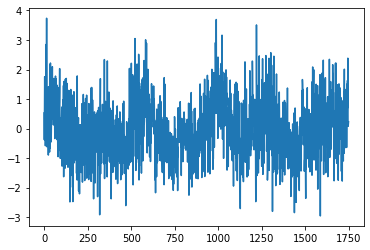

In [4]:
plt.plot(dat['responses'][:,0])

In [9]:
ep=EnsemblePursuit(lam=0.01,n_components=100,n_kmeans=100)
ep.fit(dat['responses'])

obtained 100 PCs in 2.1998 seconds
initialized 100 clusters with k-means in 1.4198 seconds
ensemble 0, time 0.76, nr neurons 1246, EV 0.0065
ensemble 25, time 14.26, nr neurons 669, EV 0.0773
ensemble 50, time 24.52, nr neurons 358, EV 0.1093
ensemble 75, time 33.37, nr neurons 279, EV 0.1304
ensemble 99, time 42.91, nr neurons 85, EV 0.1457
average sparsity is 0.0473


In [11]:
V=ep.components_
print(V.shape)
U=ep.weights
print(U.shape)

(1750, 100)
(8428, 100)


In [16]:
ensemble=np.nonzero(U[:,1])[0]

In [18]:
print(ensemble)

[  10  519  526 ... 8372 8373 8400]


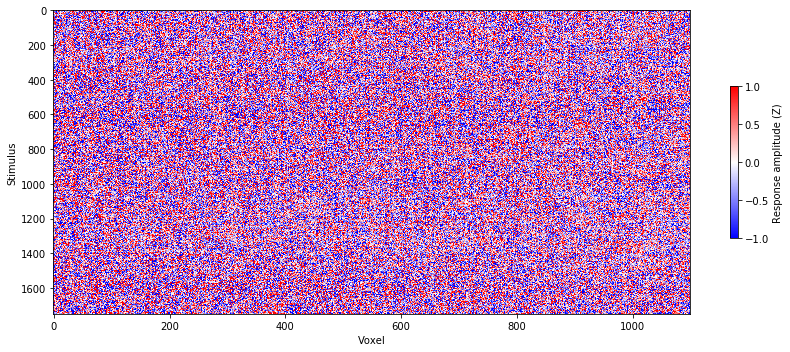

In [17]:
f, ax = plt.subplots(figsize=(12, 5))
ax.set(xlabel="Voxel", ylabel="Stimulus")
heatmap = ax.imshow(dat["responses"][:,ensemble], aspect="auto", vmin=-1, vmax=1, cmap="bwr")
f.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
f.tight_layout()